In [17]:
import openmeteo_requests
import requests_cache
import requests
import pandas as pd
import matplotlib as plt
from retry_requests import retry

#cache_session = requests_cache.CachedSession('.cache', expire_after=-1) #Guarda en un archivo local .cache para no tener que pedirlo de nuevo
#retry_session = retry(cache_session, retries=5, backoff_factor=0.2)

session = requests.Session()
retry_session = retry(session, retries=5, backoff_factor=0.2)

openmeteo = openmeteo_requests.Client(session=retry_session)

url = "https://historical-forecast-api.open-meteo.com/v1/forecast"

parametros = {
    "latitude": 40.47,
    "longitude" : -73.58, #coordenadas de Central Park
    "start_date" : "2025-01-01",
    "end_date" : "2026-01-01",
    "hourly" : "temperature_2m,rain,snowfall,precipitation,snow_depth,visibility",
    "minutely_15" : "temperature_2m,rain,snowfall,precipitation,snow_depth,visibility",
    "timezone" : "auto"
}

In [18]:
respuestas = openmeteo.weather_api(url, params = parametros)
respuesta = respuestas[0]
hourly = respuesta.Hourly()
temp_array = hourly.Variables(0).ValuesAsNumpy()
lluvia_array = hourly.Variables(1).ValuesAsNumpy()
nieve_array = hourly.Variables(2).ValuesAsNumpy()
prec_array = hourly.Variables(3).ValuesAsNumpy()
nieve_prof_array = hourly.Variables(4).ValuesAsNumpy()
visib_array = hourly.Variables(5).ValuesAsNumpy()




dates = pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=hourly.Interval()),
        inclusive="left"
)

datos = {
    "Fecha" : dates,
    "Temperatura" : temp_array,
    "Lluvia" : lluvia_array,
    "Nieve": nieve_array,
    "Precipitacion" : prec_array,
    "Profundidad de nieve" : nieve_prof_array,
    "Visibilidad" : visib_array
}
df = pd.DataFrame(datos)

In [19]:
respuestas = openmeteo.weather_api(url, params = parametros)
respuesta = respuestas[0]
minutely_15 = respuesta.Minutely15()
temp_array = minutely_15.Variables(0).ValuesAsNumpy()
lluvia_array = minutely_15.Variables(1).ValuesAsNumpy()
nieve_array = minutely_15.Variables(2).ValuesAsNumpy()
prec_array = minutely_15.Variables(3).ValuesAsNumpy()
nieve_prof_array = minutely_15.Variables(4).ValuesAsNumpy()
visib_array = minutely_15.Variables(5).ValuesAsNumpy()

dates = pd.date_range(
        start=pd.to_datetime(minutely_15.Time(), unit="s", utc=True),
        end=pd.to_datetime(minutely_15.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=minutely_15.Interval()),
        inclusive="left"
)
datos = {
    "Fecha" : dates,
    "Temperatura" : temp_array,
    "Lluvia" : lluvia_array,
    "Nieve": nieve_array,
    "Precipitacion" : prec_array,
    "Profundidad de nieve" : nieve_prof_array,
    "Visibilidad" : visib_array
}

df2 = pd.DataFrame(datos)

df2

,Fecha,Temperatura,Lluvia,Nieve,Precipitacion,Profundidad de nieve,Visibilidad
0,2025-01-01 05:00:00+00:00,8.40,0.0,0.0,0.0,0.0,12200.0
1,2025-01-01 05:15:00+00:00,8.40,0.0,0.0,0.0,0.0,12200.0
2,2025-01-01 05:30:00+00:00,8.45,0.0,0.0,0.0,0.0,12200.0
3,2025-01-01 05:45:00+00:00,8.55,0.0,0.0,0.0,0.0,12200.0
4,2025-01-01 06:00:00+00:00,8.90,0.0,0.0,0.0,0.0,13700.0
...,...,...,...,...,...,...,...
35131,2026-01-02 03:45:00+00:00,-2.40,0.0,0.0,0.0,0.0,42400.0
35132,2026-01-02 04:00:00+00:00,-2.30,0.0,0.0,0.0,0.0,38500.0
35133,2026-01-02 04:15:00+00:00,-2.60,0.0,0.0,0.0,0.0,38400.0
35134,2026-01-02 04:30:00+00:00,-2.60,0.0,0.0,0.0,0.0,38700.0


In [20]:
df3 = df2.copy()
df3["Fecha"] = pd.to_datetime(df3["Fecha"])
df3["Fecha_truncada"] = df3["Fecha"].dt.floor("h")
df3 = df3.drop(columns = "Fecha")
df_agrupado = df3.groupby("Fecha_truncada").mean()
df_agrupado_suma = df3.groupby("Fecha_truncada").sum()
df_agrupado

,Temperatura,Lluvia,Nieve,Precipitacion,Profundidad de nieve,Visibilidad
Fecha_truncada,,,,,,
2025-01-01 05:00:00+00:00,8.4500,0.0,0.0,0.0,0.0,12200.0
2025-01-01 06:00:00+00:00,8.8250,0.0,0.0,0.0,0.0,13675.0
2025-01-01 07:00:00+00:00,8.8125,0.0,0.0,0.0,0.0,14100.0
2025-01-01 08:00:00+00:00,8.7875,0.0,0.0,0.0,0.0,13900.0
2025-01-01 09:00:00+00:00,8.4125,0.0,0.0,0.0,0.0,14200.0
...,...,...,...,...,...,...
2026-01-02 00:00:00+00:00,-2.0125,0.0,0.0,0.0,0.0,43900.0
2026-01-02 01:00:00+00:00,-2.4125,0.0,0.0,0.0,0.0,44925.0
2026-01-02 02:00:00+00:00,-2.5875,0.0,0.0,0.0,0.0,39725.0


In [21]:
import openmeteo_requests
import requests_cache
import requests
import pandas as pd
from retry_requests import retry

#cache_session = requests_cache.CachedSession('.cache', expire_after=-1) #Guarda en un archivo local .cache para no tener que pedirlo de nuevo
#retry_session = retry(cache_session, retries=5, backoff_factor=0.2)

session = requests.Session()
retry_session = retry(session, retries=5, backoff_factor=0.2)

openmeteo = openmeteo_requests.Client(session=retry_session)

url = "https://archive-api.open-meteo.com/v1/archive"

parametros = {
    "latitude": 40.47,
    "longitude" : -73.58, #coordenadas de Central Park
    "start_date" : "2025-01-01",
    "end_date" : "2026-01-01",
    "hourly" : "temperature_2m,rain,snowfall,precipitation,snow_depth,visibility",
    "timezone" : "auto"
}
respuestas = openmeteo.weather_api(url, params = parametros)
respuesta = respuestas[0]
hourly = respuesta.Hourly()
temp_array = hourly.Variables(0).ValuesAsNumpy()
lluvia_array = hourly.Variables(1).ValuesAsNumpy()
nieve_array = hourly.Variables(2).ValuesAsNumpy()
prec_array = hourly.Variables(3).ValuesAsNumpy()
nieve_prof_array = hourly.Variables(4).ValuesAsNumpy()
visib_array = hourly.Variables(5).ValuesAsNumpy()




dates = pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=hourly.Interval()),
        inclusive="left"
)

datos = {
    "Fecha" : dates,
    "Temperatura" : temp_array,
    "Lluvia" : lluvia_array,
    "Nieve": nieve_array,
    "Precipitacion" : prec_array,
    "Profundidad de nieve" : nieve_prof_array,
    "Visibilidad" : visib_array
}
df = pd.DataFrame(datos)



In [22]:
df2 = df.copy()

In [23]:
df.set_index("Fecha", inplace=True)
df

,Temperatura,Lluvia,Nieve,Precipitacion,Profundidad de nieve,Visibilidad
Fecha,,,,,,
2025-01-01 05:00:00+00:00,10.50,1.5,0.0,1.5,0.0,NaN
2025-01-01 06:00:00+00:00,10.10,0.0,0.0,0.0,0.0,NaN
2025-01-01 07:00:00+00:00,9.60,0.0,0.0,0.0,0.0,NaN
2025-01-01 08:00:00+00:00,9.05,0.0,0.0,0.0,0.0,NaN
2025-01-01 09:00:00+00:00,8.75,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...
2026-01-02 00:00:00+00:00,-1.70,0.0,0.0,0.0,0.0,NaN
2026-01-02 01:00:00+00:00,-2.15,0.0,0.0,0.0,0.0,NaN
2026-01-02 02:00:00+00:00,-2.35,0.0,0.0,0.0,0.0,NaN


In [24]:
diferencias = df.compare(df_agrupado)
diferencias

Temperatura         Lluvia       Nieve        \
                                 self   other   self other  self other   
2025-01-01 05:00:00+00:00       10.50  8.4500    1.5   0.0   NaN   NaN   
2025-01-01 06:00:00+00:00       10.10  8.8250    NaN   NaN   NaN   NaN   
2025-01-01 07:00:00+00:00        9.60  8.8125    NaN   NaN   NaN   NaN   
2025-01-01 08:00:00+00:00        9.05  8.7875    NaN   NaN   NaN   NaN   
2025-01-01 09:00:00+00:00        8.75  8.4125    NaN   NaN   NaN   NaN   
...                               ...     ...    ...   ...   ...   ...   
2026-01-02 00:00:00+00:00       -1.70 -2.0125    NaN   NaN   NaN   NaN   
2026-01-02 01:00:00+00:00       -2.15 -2.4125    NaN   NaN   NaN   NaN   
2026-01-02 02:00:00+00:00       -2.35 -2.5875    NaN   NaN   NaN   NaN   
2026-01-02 03:00:00+00:00       -2.45 -2.5125    NaN   NaN   NaN   NaN   
2026-01-02 04:00:00+00:00       -2.05 -2.5250    NaN   NaN   NaN   NaN   

                          Precipitacion       Profundidad de nieve        \
                                   self other                 self other   
2025-01-01 05:00:00+00:00           1.5   0.0                  NaN   NaN   
2025-01-01 06:00:00+00:00           NaN   NaN                  NaN   NaN   
2025-01-01 07:00:00+00:00           NaN   NaN                  NaN   NaN   
2025-01-01 08:00:00+00:00           NaN   NaN                  NaN   NaN   
2025-01-01 09:00:00+00:00           NaN   NaN                  NaN   NaN   
...                                 ...   ...                  ...   ...   
2026-01-02 00:00:00+00:00           NaN   NaN                  NaN   NaN   
2026-01-02 01:00:00+00:00           NaN   NaN                  NaN   NaN   
2026-01-02 02:00:00+00:00           NaN   NaN                  NaN   NaN   
2026-01-02 03:00:00+00:00           NaN   NaN                  NaN   NaN   
2026-01-02 04:00:00+00:00           NaN   NaN                  NaN   NaN   

                          Visibilidad           
                                 self    other  
2025-01-01 05:00:00+00:00         NaN  12200.0  
2025-01-01 06:00:00+00:00         NaN  13675.0  
2025-01-01 07:00:00+00:00         NaN  14100.0  
2025-01-01 08:00:00+00:00         NaN  13900.0  
2025-01-01 09:00:00+00:00         NaN  14200.0  
...                               ...      ...  
2026-01-02 00:00:00+00:00         NaN  43900.0  
2026-01-02 01:00:00+00:00         NaN  44925.0  
2026-01-02 02:00:00+00:00         NaN  39725.0  
2026-01-02 03:00:00+00:00         NaN  42000.0  
2026-01-02 04:00:00+00:00         NaN  38600.0  

[8784 rows x 12 columns]

In [25]:
mapa_coincidencias = df == df_agrupado
tasa_por_columna = (df == df_agrupado).mean() * 100
tasa_por_columna_suma = (df == df_agrupado_suma).mean() * 100
print(tasa_por_columna)
print("-----------")
print(tasa_por_columna_suma)

Temperatura              0.717213
Lluvia                  86.703097
Nieve                   98.349271
Precipitacion           85.849271
Profundidad de nieve    28.836521
Visibilidad              0.000000
dtype: float64
-----------
Temperatura              0.045537
Lluvia                  87.044627
Nieve                   98.417577
Precipitacion           86.236339
Profundidad de nieve    28.836521
Visibilidad              0.000000
dtype: float64


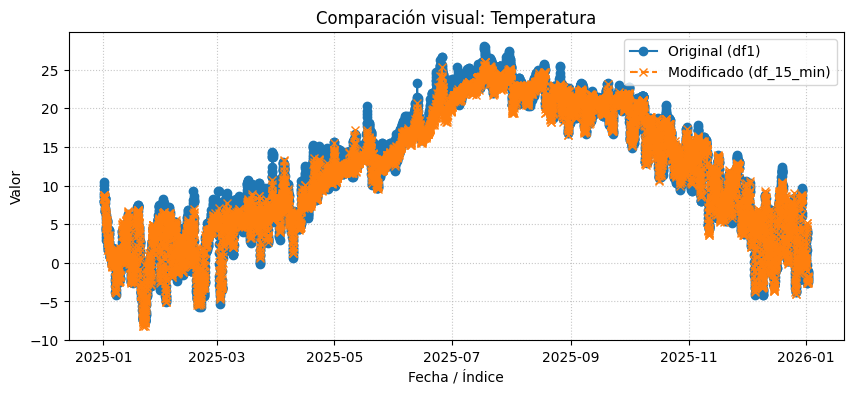

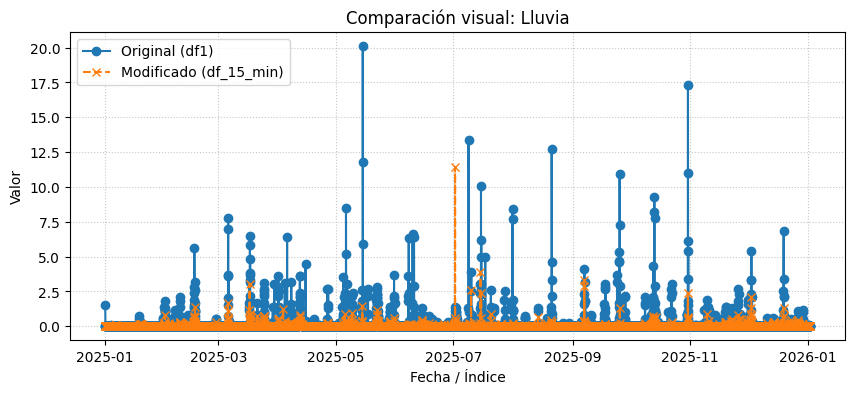

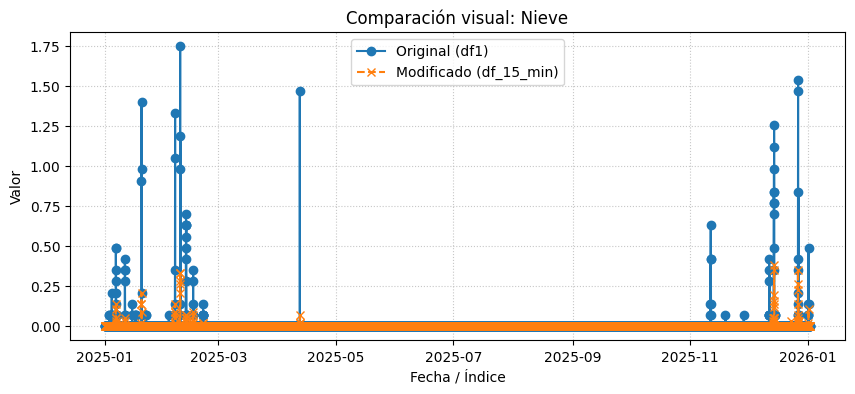

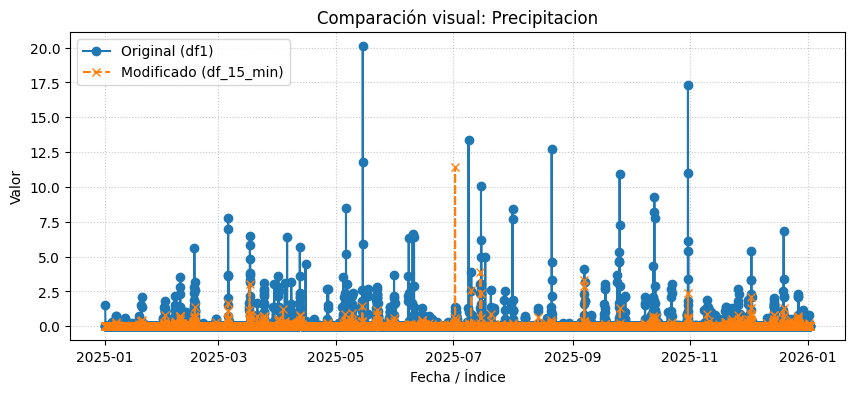

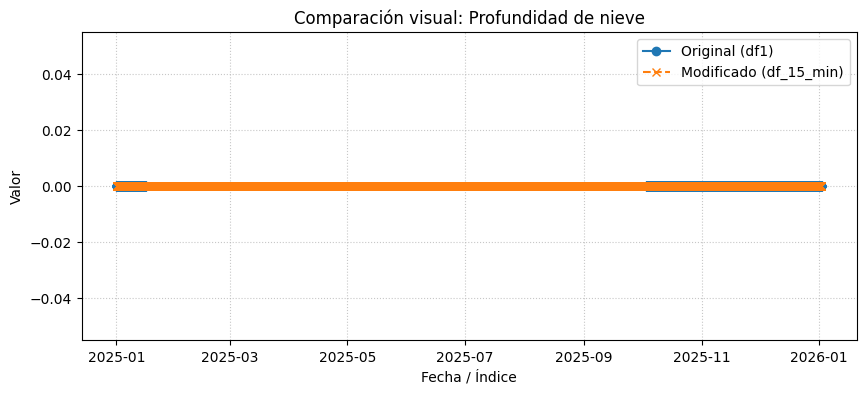

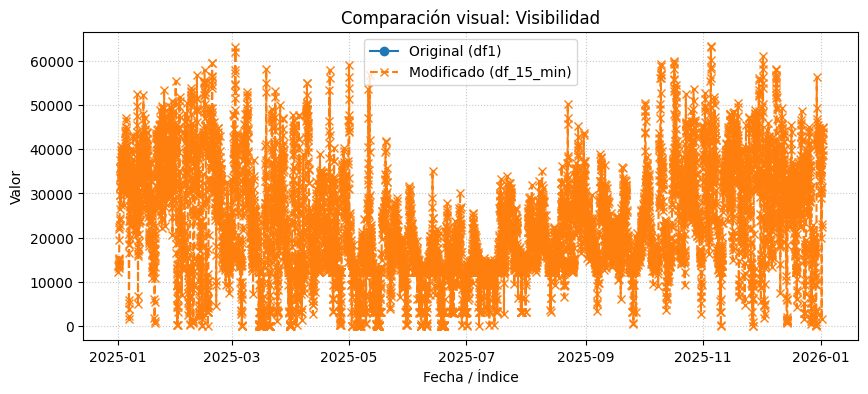

In [26]:
import matplotlib.pyplot as plt
for columna in df.columns:
    # Creamos el "lienzo" del gráfico con un tamaño específico
    plt.figure(figsize=(10, 4))
    
    # Dibujamos la línea del DataFrame 1 (línea continua azul por defecto)
    plt.plot(df.index, df[columna], label='Original (df1)', marker='o')
    
    # Dibujamos la línea del DataFrame 2 (línea discontinua naranja)
    plt.plot(df_agrupado.index, df_agrupado[columna], label='Modificado (df_15_min)', marker='x', linestyle='--')
    
    # Añadimos títulos y etiquetas para que sea fácil de leer
    plt.title(f'Comparación visual: {columna.capitalize()}')
    plt.xlabel('Fecha / Índice')
    plt.ylabel('Valor')
    
    # Activamos la leyenda y la cuadrícula de fondo
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    
    # Mostramos el gráfico
    plt.show()

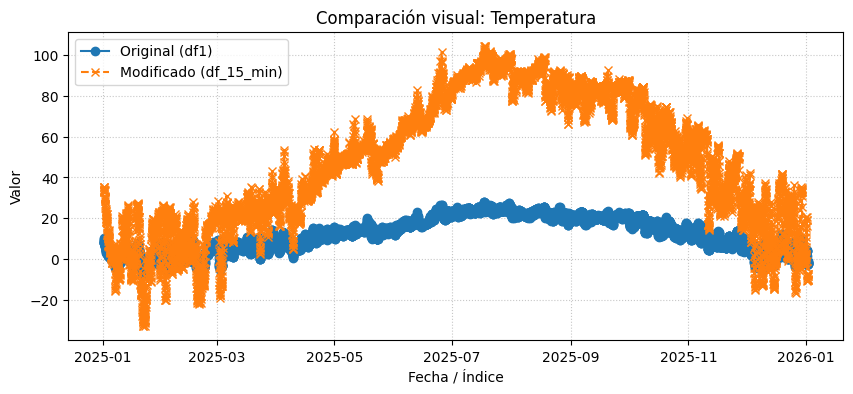

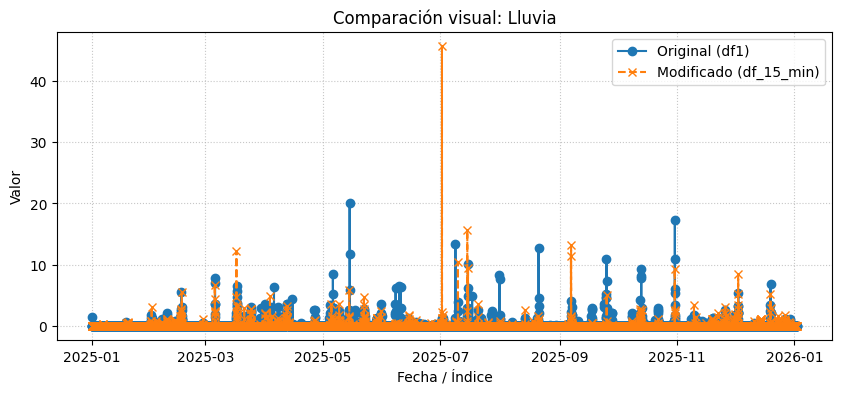

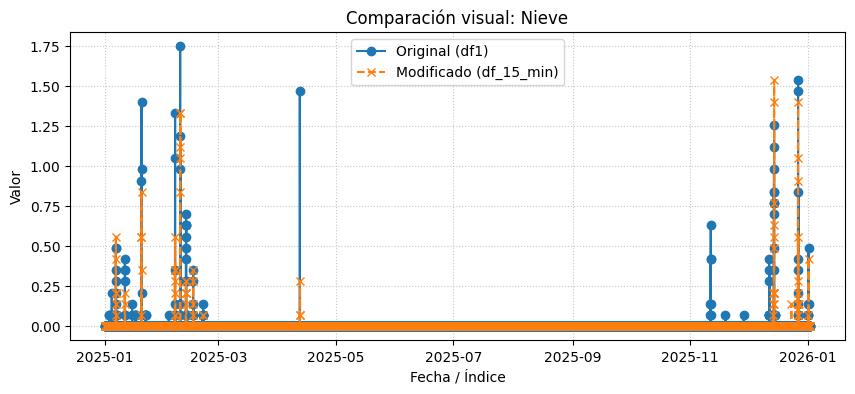

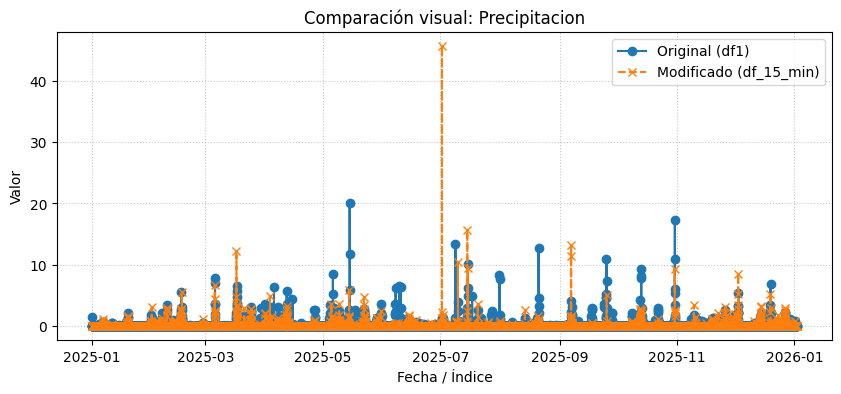

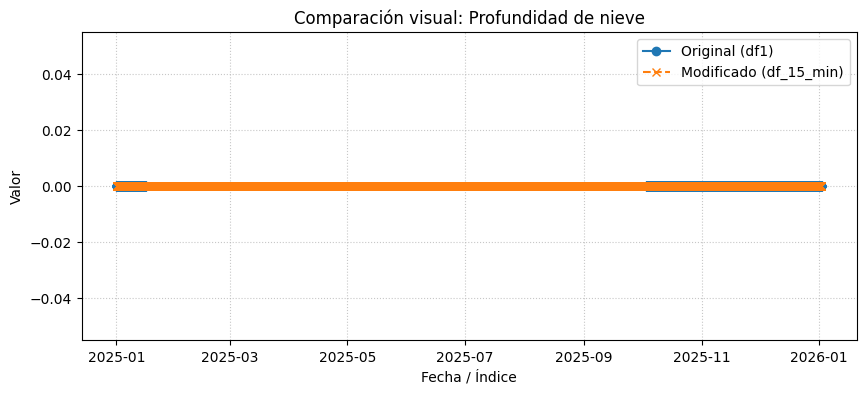

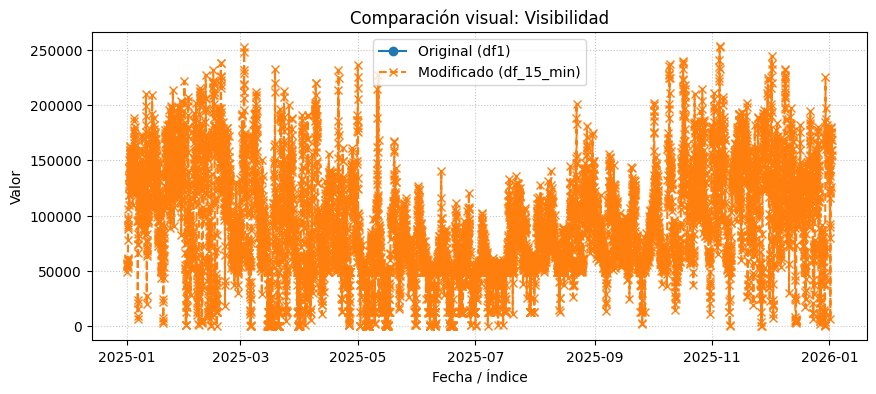

In [27]:
import matplotlib.pyplot as plt
for columna in df.columns:
    # Creamos el "lienzo" del gráfico con un tamaño específico
    plt.figure(figsize=(10, 4))
    
    # Dibujamos la línea del DataFrame 1 (línea continua azul por defecto)
    plt.plot(df.index, df[columna], label='Original (df1)', marker='o')
    
    # Dibujamos la línea del DataFrame 2 (línea discontinua naranja)
    plt.plot(df_agrupado_suma.index, df_agrupado_suma[columna], label='Modificado (df_15_min)', marker='x', linestyle='--')
    
    # Añadimos títulos y etiquetas para que sea fácil de leer
    plt.title(f'Comparación visual: {columna.capitalize()}')
    plt.xlabel('Fecha / Índice')
    plt.ylabel('Valor')
    
    # Activamos la leyenda y la cuadrícula de fondo
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    
    # Mostramos el gráfico
    plt.show()

In [37]:
dia_predicho_max_lluvia = df_agrupado_suma["Lluvia"].idxmax() 
print("Predicción de más día de lluvia haciendo la suma")
print(df_agrupado_suma.loc[dia_predicho_max_lluvia])
print("---------------")
print("Predicción de más día de lluvia haciendo la media")
print(df_agrupado.loc[dia_predicho_max_lluvia])
print("---------------")
print("Día con predicción de lluvia mayor")
print(df.loc[dia_predicho_max_lluvia])

Predicción de más día de lluvia haciendo la suma
Temperatura                85.449997
Lluvia                     45.599998
Nieve                       0.000000
Precipitacion              45.599998
Profundidad de nieve        0.000000
Visibilidad             24100.000000
Name: 2025-07-01 22:00:00+00:00, dtype: float32
---------------
Predicción de más día de lluvia haciendo la media
Temperatura               21.362499
Lluvia                    11.400000
Nieve                      0.000000
Precipitacion             11.400000
Profundidad de nieve       0.000000
Visibilidad             6025.000000
Name: 2025-07-01 22:00:00+00:00, dtype: float32
---------------
Día con predicción de lluvia mayor
Temperatura             23.25
Lluvia                   0.00
Nieve                    0.00
Precipitacion            0.00
Profundidad de nieve      NaN
Visibilidad               NaN
Name: 2025-07-01 22:00:00+00:00, dtype: float32


In [38]:
dia_max_lluvia = df["Lluvia"].idxmax() 
print("Predicción de más día de lluvia haciendo la suma")
print(df_agrupado_suma.loc[dia_max_lluvia])
print("---------------")
print("Predicción de más día de lluvia haciendo la media")
print(df_agrupado.loc[dia_max_lluvia])
print("---------------")
print("Día lluvia mayor")
print(df.loc[dia_max_lluvia])

Predicción de más día de lluvia haciendo la suma
Temperatura                55.099998
Lluvia                      0.000000
Nieve                       0.000000
Precipitacion               0.000000
Profundidad de nieve        0.000000
Visibilidad             25000.000000
Name: 2025-05-14 23:00:00+00:00, dtype: float32
---------------
Predicción de más día de lluvia haciendo la media
Temperatura               13.775
Lluvia                     0.000
Nieve                      0.000
Precipitacion              0.000
Profundidad de nieve       0.000
Visibilidad             6250.000
Name: 2025-05-14 23:00:00+00:00, dtype: float32
---------------
Día lluvia mayor
Temperatura             14.85
Lluvia                  20.10
Nieve                    0.00
Precipitacion           20.10
Profundidad de nieve      NaN
Visibilidad               NaN
Name: 2025-05-14 23:00:00+00:00, dtype: float32


In [2]:
import openmeteo_requests

import pandas as pd
import requests_cache
import requests
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
#cache_session = requests_cache.CachedSession('.cache', expire_after = 3600) #Crea un .cache para no tener que solicitar varias veces lo mismo
#retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)

session = requests.Session()
retry_session = retry(session, retries=5, backoff_factor=0.2) #solicita sin importar lo que se ha solicitado antes

openmeteo = openmeteo_requests.Client(session = retry_session)


url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 40.47,
	"longitude": -73.58,
	"hourly": ["temperature_2m", "rain", "precipitation", "wind_speed_10m", "snowfall", "cloud_cover"],
	"current": ["wind_speed_10m", "temperature_2m", "precipitation", "rain", "snowfall", "cloud_cover"],
}
responses = openmeteo.weather_api(url, params=params)


response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")


current = response.Current()
current_wind_speed_10m = current.Variables(0).Value()
current_temperature_2m = current.Variables(1).Value()
current_precipitation = current.Variables(2).Value()
current_rain = current.Variables(3).Value()
current_snowfall = current.Variables(4).Value()
current_cloud_cover = current.Variables(5).Value()

print(f"\nCurrent time: {current.Time()}")
print(f"Current wind_speed_10m: {current_wind_speed_10m}")
print(f"Current temperature_2m: {current_temperature_2m}")
print(f"Current precipitation: {current_precipitation}")
print(f"Current rain: {current_rain}")
print(f"Current snowfall: {current_snowfall}")
print(f"Current cloud_cover: {current_cloud_cover}")


hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_rain = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(3).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(4).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(5).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end =  pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["rain"] = hourly_rain
hourly_data["precipitation"] = hourly_precipitation
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["snowfall"] = hourly_snowfall
hourly_data["cloud_cover"] = hourly_cloud_cover

hourly_dataframe = pd.DataFrame(data = hourly_data)
print("\nHourly data\n", hourly_dataframe)


Coordinates: 40.45771408081055°N -73.56678771972656°E
Elevation: 0.0 m asl
Timezone difference to GMT+0: 0s

Current time: 1772005500
Current wind_speed_10m: 32.73625564575195
Current temperature_2m: 1.9500000476837158
Current precipitation: 0.0
Current rain: 0.0
Current snowfall: 0.0
Current cloud_cover: 69.0

Hourly data
                          date  temperature_2m  rain  precipitation  \
0   2026-02-25 00:00:00+00:00           1.350   0.0            0.0   
1   2026-02-25 01:00:00+00:00           0.850   0.0            0.0   
2   2026-02-25 02:00:00+00:00           0.950   0.0            0.0   
3   2026-02-25 03:00:00+00:00           1.100   0.0            0.0   
4   2026-02-25 04:00:00+00:00           0.350   0.0            0.0   
..                        ...             ...   ...            ...   
163 2026-03-03 19:00:00+00:00          -0.374   0.0            0.0   
164 2026-03-03 20:00:00+00:00           0.076   0.0            0.0   
165 2026-03-03 21:00:00+00:00           0.37

In [6]:
import datetime
current_time = current.Time()
fecha_local = datetime.datetime.fromtimestamp(current_time)
fecha_utc = datetime.datetime.fromtimestamp(current_time, datetime.timezone.utc)
texto_formateado = fecha_utc.strftime('%d/%m/%Y %H:%M:%S')
print(fecha_local)
print(fecha_utc)

2026-02-25 08:45:00
2026-02-25 07:45:00+00:00


In [3]:
hourly_dataframe.loc[len(hourly_dataframe)] = [current.Time(), current_temperature_2m, current_rain, current_precipitation, current_wind_speed_10m, current_snowfall, current_cloud_cover]

hourly_dataframe

,date,temperature_2m,rain,precipitation,wind_speed_10m,snowfall,cloud_cover
0,2026-02-25 00:00:00+00:00,1.350,0.0,0.0,41.556225,0.0,34.0
1,2026-02-25 01:00:00+00:00,0.850,0.0,0.0,30.718357,0.0,45.0
2,2026-02-25 02:00:00+00:00,0.950,0.0,0.0,22.180206,0.0,10.0
3,2026-02-25 03:00:00+00:00,1.100,0.0,0.0,19.602652,0.0,7.0
4,2026-02-25 04:00:00+00:00,0.350,0.0,0.0,8.396570,0.0,2.0
...,...,...,...,...,...,...,...
164,2026-03-03 20:00:00+00:00,0.076,0.0,0.0,27.238941,0.0,100.0
165,2026-03-03 21:00:00+00:00,0.376,0.0,0.0,28.551426,0.0,100.0
166,2026-03-03 22:00:00+00:00,0.426,0.0,0.0,30.173496,0.0,100.0
167,2026-03-03 23:00:00+00:00,0.326,0.0,0.0,31.534437,0.0,100.0
